# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})
weather_df

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1

for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        city_country = weather_json["sys"]["country"]
        city_latitude = weather_json["coord"]["lat"]
        city_longitude = weather_json["coord"]["lat"]
        city_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        city_max_temperature = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_windspeed = weather_json["wind"]["speed"]
        city_cloud = weather_json["clouds"]["all"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Latitude":city_latitude,
            "Longitude":city_longitude,
            "Date":city_date,
            "Temperature":city_max_temperature, 
            "Humidity":city_humidity,
            "Wind Speed":city_windspeed,
            "Clouds":city_cloud
        }, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | hasanabad
Insufficient data. Skipping..
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | amderma
Insufficient data. Skipping..
Processing Record 3 of Set 1 | saleaula
Insufficient data. Skipping..
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | bershet
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | khadyzhensk
Processing Record 8 of Set 1 | ruatoria
Insufficient data. Skipping..
Processing Record 8 of Set 1 | arcata
Processing Record 9 of Set 1 | kamaishi
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | faya
Processing Record 14 of Set 1 | ahuimanu
Processing Reco

Processing Record 159 of Set 1 | buin
Processing Record 160 of Set 1 | mount gambier
Processing Record 161 of Set 1 | mbandaka
Processing Record 162 of Set 1 | saint-pierre
Processing Record 163 of Set 1 | benjamin constant
Processing Record 164 of Set 1 | marica
Processing Record 165 of Set 1 | beckley
Processing Record 166 of Set 1 | kambja
Processing Record 167 of Set 1 | saint george
Processing Record 168 of Set 1 | severo-kurilsk
Processing Record 169 of Set 1 | yulara
Processing Record 170 of Set 1 | keti bandar
Processing Record 171 of Set 1 | asekeyevo
Processing Record 172 of Set 1 | aksarka
Processing Record 173 of Set 1 | abu samrah
Processing Record 174 of Set 1 | kaniama
Processing Record 175 of Set 1 | dunedin
Processing Record 176 of Set 1 | sentyabrskiy
Insufficient data. Skipping..
Processing Record 176 of Set 1 | kodiak
Processing Record 177 of Set 1 | honjo
Processing Record 178 of Set 1 | samusu
Insufficient data. Skipping..
Processing Record 178 of Set 1 | jimo
Pro

Processing Record 323 of Set 1 | mareeba
Processing Record 324 of Set 1 | maldonado
Processing Record 325 of Set 1 | santa vitoria do palmar
Processing Record 326 of Set 1 | nioro
Processing Record 327 of Set 1 | mango
Processing Record 328 of Set 1 | liloan
Processing Record 329 of Set 1 | harper
Processing Record 330 of Set 1 | ornskoldsvik
Processing Record 331 of Set 1 | coihaique
Processing Record 332 of Set 1 | coihueco
Processing Record 333 of Set 1 | palora
Processing Record 334 of Set 1 | kalachinsk
Processing Record 335 of Set 1 | upington
Processing Record 336 of Set 1 | arrecife
Insufficient data. Skipping..
Processing Record 336 of Set 1 | mackenzie
Processing Record 337 of Set 1 | tuatapere
Processing Record 338 of Set 1 | hihifo
Insufficient data. Skipping..
Processing Record 338 of Set 1 | kasongo
Processing Record 339 of Set 1 | kieta
Processing Record 340 of Set 1 | gushikawa
Processing Record 341 of Set 1 | totness
Processing Record 342 of Set 1 | korla
Insufficient 

Insufficient data. Skipping..
Processing Record 484 of Set 1 | petatlan
Processing Record 485 of Set 1 | gopalganj
Processing Record 486 of Set 1 | mahibadhoo
Processing Record 487 of Set 1 | tubruq
Insufficient data. Skipping..
Processing Record 487 of Set 1 | lorengau
Processing Record 488 of Set 1 | vostok
Processing Record 489 of Set 1 | pundaguitan
Processing Record 490 of Set 1 | padang
Processing Record 491 of Set 1 | uvira
Processing Record 492 of Set 1 | kuche
Insufficient data. Skipping..
Processing Record 492 of Set 1 | san ramon
Processing Record 493 of Set 1 | athabasca
Processing Record 494 of Set 1 | tatawin
Insufficient data. Skipping..
Processing Record 494 of Set 1 | grosseto
Processing Record 495 of Set 1 | xining
Processing Record 496 of Set 1 | ngukurr
Insufficient data. Skipping..
Processing Record 496 of Set 1 | acapulco
Processing Record 497 of Set 1 | kondinskoye
Processing Record 498 of Set 1 | isla aguada
Processing Record 499 of Set 1 | tigil
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
weather_df

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,ribeira grande,PT,38.52,38.52,2019-03-10,289.460,95.0,7.82,76.0
1,vao,EE,59.10,59.10,2019-03-10,265.260,93.0,2.77,20.0
2,bathsheba,BB,13.22,13.22,2019-03-10,298.150,65.0,6.20,20.0
3,bershet,RU,57.73,57.73,2019-03-10,272.150,86.0,3.00,90.0
4,barrow,AR,-38.31,-38.31,2019-03-10,288.335,49.0,4.37,0.0
5,punta arenas,CL,-53.16,-53.16,2019-03-10,285.150,76.0,8.70,90.0
6,khadyzhensk,RU,44.42,44.42,2019-03-10,277.185,55.0,2.52,8.0
7,arcata,US,40.87,40.87,2019-03-10,285.150,100.0,4.10,75.0
8,kamaishi,JP,39.28,39.28,2019-03-10,279.150,93.0,6.70,75.0
9,ushuaia,AR,-54.81,-54.81,2019-03-10,284.150,81.0,11.80,75.0


In [5]:
# Export to CSV
weather_df.to_csv(r'cities.csv')

In [6]:
# Describe DataFrame
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Clouds
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,22.264183,22.264183,284.739470,75.786355,3.663465,40.328546
std,32.842868,32.842868,13.895021,19.607460,2.611717,35.534685
min,-54.810000,-54.810000,242.150000,11.000000,0.270000,0.000000
25%,-3.440000,-3.440000,273.710000,66.000000,1.770000,0.000000
50%,29.700000,29.700000,287.910000,81.000000,3.100000,40.000000
75%,49.720000,49.720000,296.835000,91.000000,4.870000,75.000000
max,78.220000,78.220000,313.150000,100.000000,21.600000,100.000000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

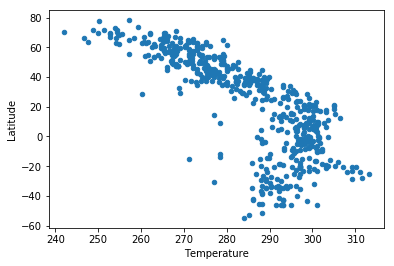

In [7]:
lat_tmp_plt = weather_df.plot.scatter(x='Temperature', y='Latitude')

plt.savefig('Temperature vs Latitude.png')

#### Latitude vs. Humidity Plot

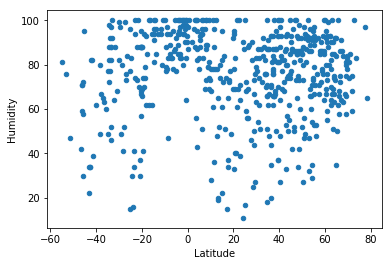

In [8]:
lat_hum_plt = weather_df.plot.scatter(x='Latitude', y='Humidity')

plt.savefig('Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

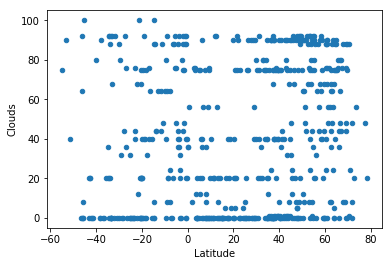

In [9]:
lat_cld_plt = weather_df.plot.scatter(x='Latitude', y='Clouds')

plt.savefig('Latitude vs. Cloudiness.png')

#### Latitude vs. Wind Speed Plot

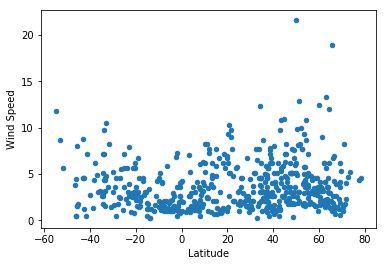

In [10]:
lat_wspeed_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed')

plt.savefig('Latitude vs. Wind Speed.png')